<a href="https://colab.research.google.com/github/GhKTW/2024_AI_Project_song_logi_reg/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B7%A0%EB%93%B1%2C_%EC%A0%95%EA%B7%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브러리, 파일 업로드



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
files.upload()
files.upload()

In [ ]:
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')
music_features = pd.read_json('echonest-metrics.json',precise_float=True)
tracks

In [ ]:
music_features

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


데이터 준비

In [ ]:
audio_data=music_features.merge(tracks[['genre_top', 'track_id']], on='track_id')
audio_data

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


In [ ]:
m = len(audio_data)
m

4802

결측치

In [ ]:
rows_with_na = audio_data[audio_data.isna().any(axis=1)]

print(rows_with_na)

Empty DataFrame
Columns: [track_id, acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo, valence, genre_top]
Index: []


이상치

In [ ]:
audio_data2 = audio_data[(audio_data['genre_top']=='Hip-Hop')|(audio_data['genre_top']=='Rock')]
audio_data2

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


변수

In [ ]:
x1 = audio_data2[['acousticness']]
x2 = audio_data2[['danceability']]
x3 = audio_data2[['energy']]
x4 = audio_data2[['instrumentalness']]
x5 = audio_data2[['liveness']]
x6 = audio_data2[['speechiness']]
x7 = audio_data2[['tempo']]
x8 = audio_data2[['valence']]
y = audio_data2[['genre_top']]

m = len(y)
m

4802

class

In [ ]:
yb = audio_data2['genre_top'].apply(lambda x: 1 if x == 'Hip-Hop' else 0)
print(yb)

0       1
1       1
2       1
3       1
4       0
       ..
4797    1
4798    1
4799    1
4800    1
4801    1
Name: genre_top, Length: 4802, dtype: int64


In [ ]:
hiphop_count = audio_data2['genre_top'].value_counts()['Hip-Hop']
print("힙합 클래스의 데이터 수:", hiphop_count)
rock_count = audio_data2['genre_top'].value_counts()['Rock']
print("락 클래스의 데이터 수:", rock_count)


힙합 클래스의 데이터 수: 910
락 클래스의 데이터 수: 3892


In [ ]:
rock_data = audio_data[audio_data['genre_top'] == 'Rock']
rock_count = len(rock_data)
desired_samples = len(audio_data[audio_data['genre_top'] == 'Hip-Hop'])
undersampled_rock_data = rock_data.sample(n=desired_samples, random_state=42)
audio_data_balanced = pd.concat([audio_data[audio_data['genre_top'] == 'Hip-Hop'], undersampled_rock_data], ignore_index=True)
print(audio_data_balanced)

      track_id  acousticness  danceability    energy  instrumentalness  \
0            2      0.416675      0.675894  0.634476          0.010628   
1            3      0.374408      0.528643  0.817461          0.001851   
2            5      0.043567      0.745566  0.701470          0.000697   
3          134      0.452217      0.513238  0.560410          0.019443   
4          583      0.748986      0.765886  0.513173          0.957209   
...        ...           ...           ...       ...               ...   
1815    101109      0.000436      0.399244  0.641134          0.000924   
1816      4760      0.871043      0.350874  0.043947          0.843731   
1817     11614      0.946699      0.439567  0.623896          0.955991   
1818     47461      0.961283      0.625932  0.195421          0.000025   
1819       305      0.764248      0.733112  0.079487          0.935461   

      liveness  speechiness    tempo   valence genre_top  
0     0.177647     0.159310  165.922  0.576661   Hip

In [ ]:
hiphop_count = audio_data_balanced['genre_top'].value_counts()['Hip-Hop']
print("힙합 클래스의 데이터 수:", hiphop_count)
rock_count = audio_data_balanced['genre_top'].value_counts()['Rock']
print("락 클래스의 데이터 수:", rock_count)

힙합 클래스의 데이터 수: 910
락 클래스의 데이터 수: 910


In [ ]:
x1_bal = audio_data_balanced[['acousticness']]
x2_bal = audio_data_balanced[['danceability']]
x3_bal = audio_data_balanced[['energy']]
x4_bal = audio_data_balanced[['instrumentalness']]
x5_bal = audio_data_balanced[['liveness']]
x6_bal = audio_data_balanced[['speechiness']]
x7_bal = audio_data_balanced[['tempo']]
x8_bal = audio_data_balanced[['valence']]
y_bal = audio_data_balanced[['genre_top']]

In [ ]:
#데이터 정규화
def normalize_feature(feature):
    min_val = np.min(feature)
    max_val = np.max(feature)
    normalized_feature = (feature - min_val) / (max_val - min_val)
    return normalized_feature

x1_norm = normalize_feature(x1_bal)
x2_norm = normalize_feature(x2_bal)
x3_norm = normalize_feature(x3_bal)
x4_norm = normalize_feature(x4_bal)
x5_norm = normalize_feature(x5_bal)
x6_norm = normalize_feature(x6_bal)
x7_norm = normalize_feature(x7_bal)
x8_norm = normalize_feature(x8_bal)
y_bal = audio_data_balanced[['genre_top']]
m = len(y_bal)
m

1820

In [ ]:
yb = audio_data_balanced['genre_top'].apply(lambda x: 1 if x == 'Hip-Hop' else 0)
print(yb)

0       1
1       1
2       1
3       1
4       1
       ..
1815    0
1816    0
1817    0
1818    0
1819    0
Name: genre_top, Length: 1820, dtype: int64


변수 벡터

In [ ]:
x0 = np.ones((m,1))
xb = np.c_[x0,x1_norm,x2_norm,x3_norm,x4_norm,x5_norm,x6_norm,x7_norm,x8_norm]

yb = (np.array(yb)).reshape(m,1)
print(yb)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


permutation

In [ ]:
#numpy의 random permutation 사용
def permutation_split(X, Y, ratio = 0.6, random_state = 1004):
  #train set의 크기: num_a, test_set의 크기: num_b
  num_a = int(X.shape[0]*ratio)
  num_b = X.shape[0] - num_a

  np.random.seed(random_state)
  shuffle = np.random.permutation(X.shape[0])

  X = X[shuffle,:]
  Y = Y[shuffle,:]

  Xa = X[:num_a]
  Ya = Y[:num_a]

  Xb = X[:num_b]
  Yb = Y[:num_b]

  return Xa, Xb, Ya, Yb

In [ ]:
Xb_train, Xb_test, Y_train, Y_test = permutation_split (xb, yb, 0.6)

loss function

In [ ]:
def loss_CE(y_hat, y):
  epsilon = 1e-15 ##10의 -15승
  y_hat = np.clip(y_hat, epsilon, 1-epsilon)
  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

model

In [ ]:
class LogisticRegressionNumpy:
  def __init__ (self, learning_rate = 0.001, n_iter = 10000): #hyperparameter 입력
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.theta = None #일단 아무것도 없는 값으로 초기화, model의 parameter

  def sigmoid(self, z):
    return 1/(1 + np.exp(-z))

  def train(self, X, y):
    #data의 수(m)와 속성의 수(n)를 설정
    m, n = X.shape
    self.theta = np.zeros((n, 1))
    #self.theta[7, 0] = 0.05
    loss_arr = []
    #gradient descent method
    for n_iter in range(self.n_iter):
      # y_hat을 계산
      z = X.dot(self.theta)
      y_hat = self.sigmoid(z)

      #loss 계산 출력
      loss = loss_CE(y_hat, y)
      loss_arr.append (loss)

      #gradient 계산
      gradient = (1/m) *X.T.dot(y_hat - y)
      #gradient descent
      self.theta = self.theta - self.learning_rate * gradient

    return loss_arr

  def predict (self, X):
      # y_hat을 계산
      z = X.dot(self.theta)
      y_hat = self.sigmoid(z)

      #logistic regression: y_hat의 값이 0.5보다 작으면 0, 크면 1을 return
      y_hat_cls = [1 if i > 0.5 else 0 for i in y_hat]
      return y_hat_cls

traing

Text(0, 0.5, 'loss')

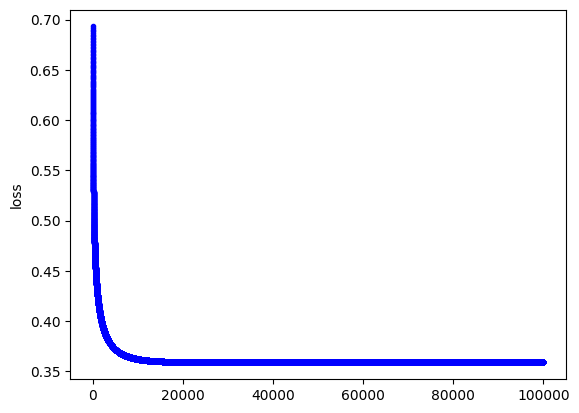

In [ ]:
model = LogisticRegressionNumpy (learning_rate = 0.1, n_iter = 100000)
loss_arr = model.train(Xb_train, Y_train)

import matplotlib.pyplot as plt

plt.plot(loss_arr, '.b')

plt.ylabel('loss')

정확도

In [ ]:
#정확도 = 정답/전체 데이터 수

#train에 대한 결과
prediction = model.predict(Xb_train)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_train[i])
print(100 * (cnt/len(prediction)))

#test data에 대한 결과
prediction = model.predict(Xb_test)
cnt = 0
for i in range(len(prediction)):
  cnt += (prediction[i] == Y_test[i])
print(100 * (cnt/len(prediction)))

[86.53846154]
[85.71428571]


데이터를 균등하게 맞춰주기 전에는 정확도가 89퍼, 맞춘 후에는 86퍼가 나옴->왜그런지 모르겠음

정규화는 성공한듯